# Работа с Excel

## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

In [1]:
import openpyxl

bread = openpyxl.open("себестоимостьА_в1.xlsx")
sheet = bread.active

prices = [sheet[14][col].value for col in range(6, 15)]

hungarian_ingr = [sheet[7][column].value for column in range(6, 15) if sheet[7][column].value]
bread1 = [i * j for i, j in zip(prices, hungarian_ingr)]

barbary_ingr = [sheet[8][column].value for column in range(6, 15) if sheet[8][column].value]
bread2 = [i * j for i, j in zip(prices, barbary_ingr)]

paris_ingr = [sheet[9][column].value for column in range(6, 15) if sheet[9][column].value]
bread3 = [i * j for i, j in zip(prices, paris_ingr)]

ciabatta = [sheet[10][column].value for column in range(6, 15) if sheet[10][column].value]
bread4 = [i * j for i, j in zip(prices, ciabatta)]

print(f'Себестоимость хлеба Венгерский: {sum(bread1)}\nСебестоимость хлеба Барбари: {sum(bread2):.2f}\nСебестоимость хлеба парижский: {sum(bread3)}\nСебестоимость хлеба Чиабатта: {sum(bread4)}')

Себестоимость хлеба Венгерский: 21.48
Себестоимость хлеба Барбари: 28.72
Себестоимость хлеба парижский: 21.816
Себестоимость хлеба Чиабатта: 5.615


2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

In [11]:
import xlwings as xw
book = xw.Book('себестоимостьА_в1.xlsx')
sheet_bread = book.sheets['Рецептура']
sheet_bread.range('P6').value = 'Себестоимости хлеба'
sheet_bread.range('P7:P10').options(transpose = True).value = sum(bread1), sum(bread2), sum(bread3), sum(bread4)

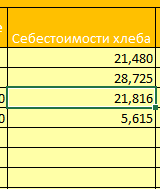

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

In [10]:
for ws in book.sheets:
        ws.autofit(axis="columns")

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [1]:
import pandas as pd
reviews = pd.read_csv('reviews_sample.csv', index_col=0)
recipes = pd.read_csv('recipes_sample.csv', usecols= ['id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients'])
recipes

,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


In [51]:
reviews

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [21]:
rand_reviews = reviews.sample(frac=0.05)
rand_recipes = recipes.sample(frac=0.05)

with pd.ExcelWriter('recipes.xlsx', mode='w') as file:
    rand_recipes.to_excel(file, sheet_name='Рецепты')
    rand_reviews.to_excel(file, sheet_name='Отзывы')

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [33]:
import xlwings as xw
seconds_assign = recipes['minutes'] * 60 #Переводим минуты в секунды

excel_book = xw.Book('recipes.xlsx')

sheet_recipes = excel_book.sheets['Рецепты']
sheet_recipes.range('H2').options(transpose = True).value = list(seconds_assign) #Добавляет все значенив по вертикали 
#При transpose = False добавляет значения по горизонтали

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [34]:
for i in range(2, len(seconds_assign)+2):
    sheet_recipes.range(f'I{i}').formula = f'=H{i}' 

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [36]:
sheet_recipes.range('H1:I1').value = 'Seconds'
sheet_recipes.range('H1:I1').api.Font.Bold = True #Включает жирность текста
sheet_recipes.range('H1:I1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter #Выравнивает по центру

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [50]:
for i in range(2, 1502):
    if int(sheet_recipes.range(f'D{i}').value) < 5:
        sheet_recipes.range(f'D{i}').color = (0, 128, 0) #Зеленый. Цвет закодирован в RGB коде
    elif int(sheet_recipes.range('D'+str(i)).value) >= 5 and int(sheet_recipes.range('D'+str(i)).value) <= 10:
        sheet_recipes.range(f'D{i}').color = (255, 255, 0) #Желтый
    elif int(sheet_recipes.range(f'D{i}').value) > 10:
        sheet_recipes.range(f'D{i}').color = (255, 0, 0) #Красный

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [53]:
sheet_recipes.range('J2:J1501').formula = '=COUNTIF(Отзывы!$C$2:$C$6336, C2)'

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [54]:
import xlwings as xw

sheet_reviews = excel_book.sheets['Отзывы']

def validate(line_rat, line_res):
    if (sheet_reviews.range(line_rat).value in [0, 1, 2, 3, 4, 5]) and (sheet_reviews.range(line_res).value in sheet_recipes.range('C2:C1501').value):
        print('Соответствие верно')
    else:
        sheet_reviews.range('A'+str(line_rat[1])+':F'+str(line_rat[1])).fill = PatternFill('solid', fgColor = 'ff0000')
        
        
for i in range(2, 6338):
    validate('E'+str(i), 'C'+str(i))

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [11]:
import csv

with open('recipes_model.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter = '\t')
    data = list(reader)
    
wb = xw.Book()
sheet = wb.sheets.add('Модель')

sheet.range('A2').value = data

wb.save('recipes_model1.xlsx')
wb.close()

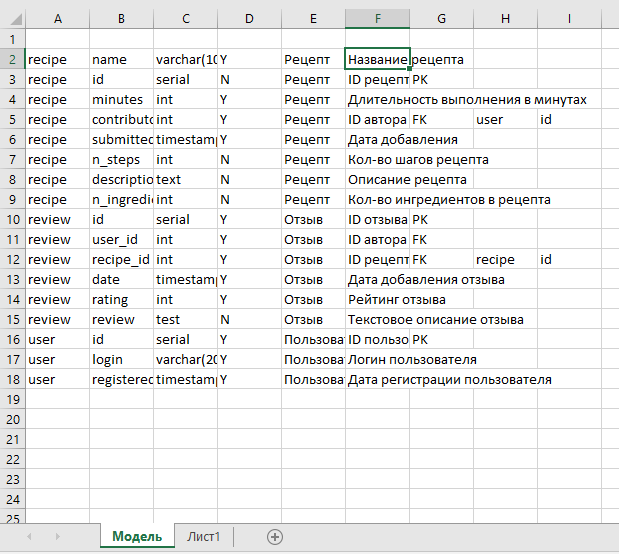

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
wb = xw.Book('recipes_model1.xlsx')
sheet = wb.sheets['Модель']

# Определяем количество строк, начиная со второй строки
n_rows = sheet.range('A2').current_region.last_cell.row - 1

# Протягиваем формулу по столбцу J
for i in range(2, n_rows+2):
    # Получаем значения из столбцов B, C, H и I
    b_val = sheet.range(f'B{i}').value
    c_val = sheet.range(f'C{i}').value.upper()
    h_val = sheet.range(f'H{i}').value
    i_val = sheet.range(f'I{i}').value
    
    # Формируем строку на основе столбцов B, C и Ключ
    j_val = f'{b_val} {c_val}'
    key_val = sheet.range(f'F{i}').value
    if key_val == 'PK':
        j_val += ' PRIMARY KEY'
    elif key_val == 'FK':
        j_val += f' REFERENCES {h_val}({i_val})'
        
    # Добавляем ключевое слово "NOT NULL", если столбец обязателен к заполнению
    required_val = sheet.range(f'D{i}').value
    if required_val == 'Y' and key_val != 'PK':
        j_val += ' NOT NULL'
    
    # Записываем полученное значение в столбец J
    sheet.range(f'J{i}').value = j_val
    
wb.save('recipes_model.xlsx')
wb.close()

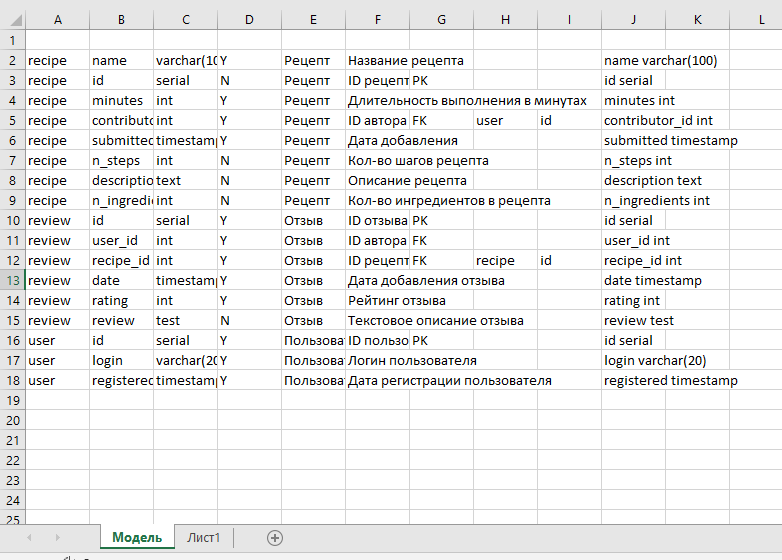

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
wb = xw.Book('recipes_model1.xlsx')
sht = wb.sheets['Модель']

# Устанавливаем цвет заливки для заголовков
sht.range('A2:J2').color = (0, 204, 255) #переводим 00ccff в RGB код (0, 204, 255)

# Применяем автоподбор ширины столбца
sht.autofit('c')

# Делаем шрифт заголовков полужирным
sht.range('A2:J2').api.Font.Bold = True

# Добавляем таблице автофильтр
sht.range('A2:J2').api.AutoFilter()

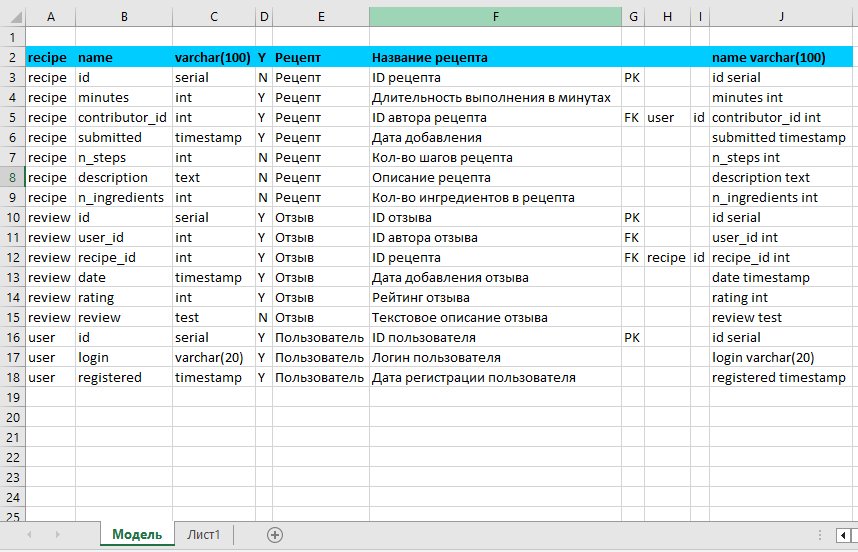

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [ ]:
try:
    wb.sheets.add('Статистика')
except:
    pass
finally:
    stats_sheet = wb.sheets['Статистика']
model = sht1['A1:B18'].value
model_table = pd.DataFrame(model[1:], columns = model[0])
grouped_data = model_table.groupby('Сущность').count()
stats_sheet['A1'].value = grouped_data
figure = grouped_data.plot.bar().get_figure()